In [1]:
import numpy as np
import nibabel as nib

from nilearn import plotting
from scipy.ndimage import binary_dilation
from os.path import join
from glob import glob

import matplotlib.pyplot as plt

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [61]:
roi_dir = "/Users/katherine.b/Dropbox/Projects/habenula/hcp_rois"

In [63]:
rois = glob(f"{roi_dir}/*kb.nii.gz", recursive=False)

In [64]:
np.unique([i.split('/')[-1].split('-')[0] for i in rois]).shape

(177,)

In [65]:
hb_sum = np.zeros_like(nib.load(rois[0]).get_fdata())

In [66]:
for roi in rois:
    roi_arr = nib.load(roi).get_fdata()
    roi_arr = binary_dilation(roi_arr)
    hb_sum += roi_arr

In [67]:
hb_avg = hb_sum / float(len(rois))

In [68]:
hb_nii = nib.Nifti2Image(hb_sum, nib.load(rois[0]).affine)
hb_avg_nii = nib.Nifti2Image(hb_avg, nib.load(rois[0]).affine)
hb_nii.to_filename(join(roi_dir, 'hcp_hb_sum.nii.gz'))
hb_avg_nii.to_filename(join(roi_dir, 'hcp_hb_avg.nii.gz'))

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


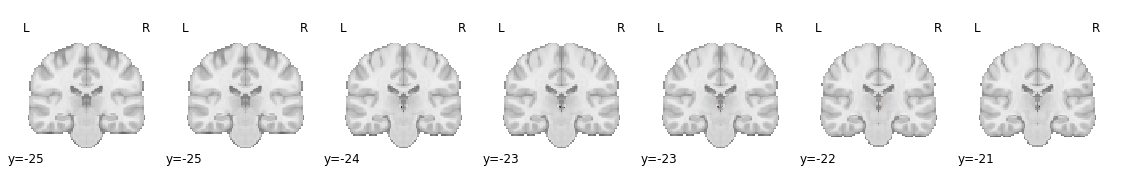

In [69]:
h = plotting.plot_roi(hb_avg_nii, draw_cross=False, display_mode='y', cmap='inferno',vmax=0.6)
h.savefig('hb_mean.png', dpi=600)

In [70]:
len(rois)

177

In [71]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

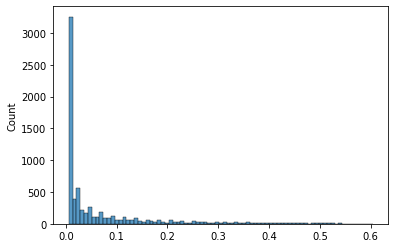

In [72]:

sns.histplot(hb_avg[hb_avg > 0])

In [73]:
hcp_t = "/Users/katherine.b/Dropbox/Projects/habenula/resting-state/habenula-rsfc-randomise/hcp7t/hcp_96_subj-2019-04-30_sm-0.0mm_tstat1.nii.gz"
auburn_t = "/Users/katherine.b/Dropbox/Projects/habenula/resting-state/habenula-rsfc-randomise/nov20-nilearn_plus_randomise/au_5mm_tstat1.nii.gz"
colin = "/Users/katherine.b/Dropbox/Data/templates/Colin27_T1_seg_MNI-152.nii.gz"

In [77]:
from nilearn import datasets

fsaverage = datasets.fetch_surf_fsaverage()



In [83]:
cut_z = [-47, -33, -19, 0, 17, 36, 49]
cut_x = [45, 35, 8, 0, -8, -20, -33, -54]

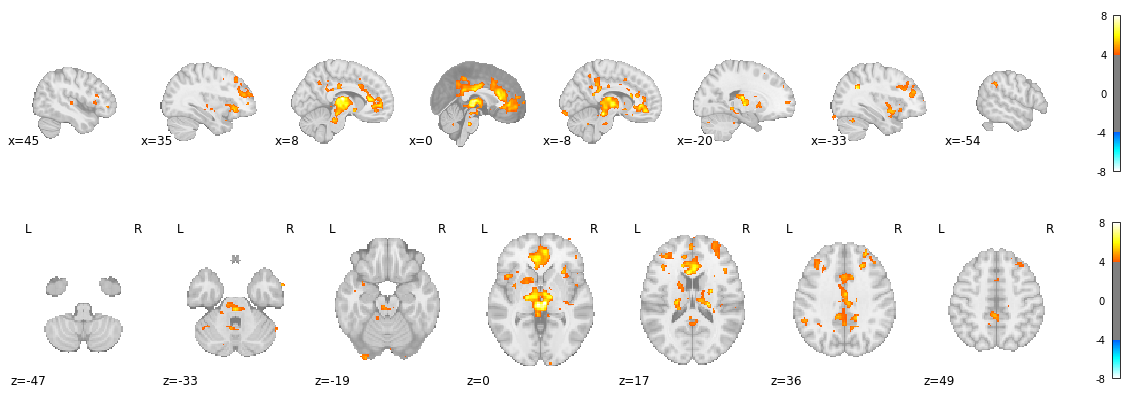

In [84]:
fig,ax = plt.subplots(nrows=2, figsize=(20,7))

g = plotting.plot_stat_map(auburn_t, threshold=4, display_mode='x', cut_coords=cut_x, axes=ax[0])
h = plotting.plot_stat_map(auburn_t, threshold=4, display_mode='z', cut_coords=cut_z, axes=ax[1])
fig.savefig('/Users/katherine.b/Dropbox/Projects/habenula/figures/auburn_randomise_5mm_t>4-slices.png', dpi=600)

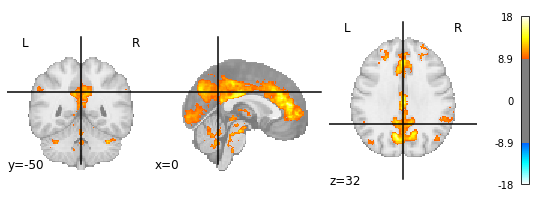

In [85]:
h = plotting.plot_stat_map(hcp_t, threshold=9)
h.savefig('/Users/katherine.b/Dropbox/Projects/habenula/figures/hcp_randomise_0mm_t>9-ortho.png', dpi=600)

In [86]:
plotting.plot_img_on_surf(auburn_t, threshold=4, output_file='/Users/katherine.b/Dropbox/Projects/habenula/figures/auburn_randomise_5mm_t>4-suface.png')

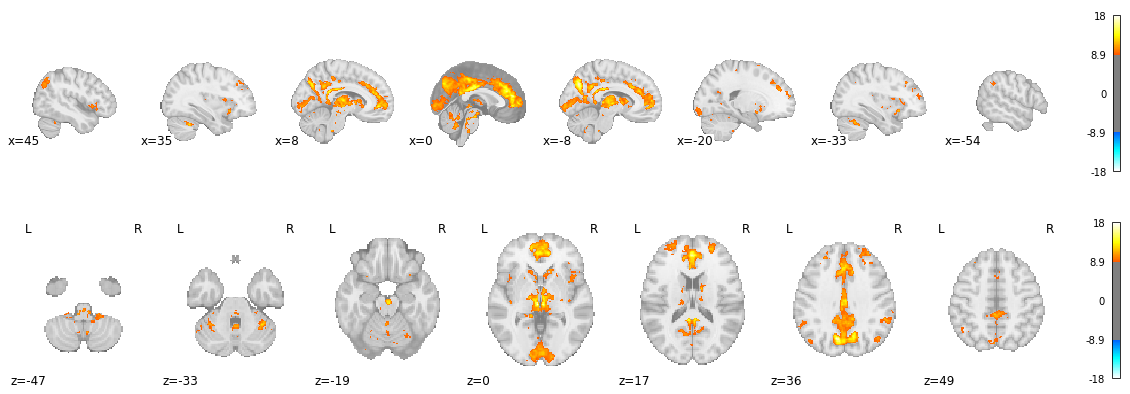

In [87]:
fig,ax = plt.subplots(nrows=2, figsize=(20,7))

g = plotting.plot_stat_map(hcp_t, threshold=9, display_mode='x', cut_coords=cut_x, axes=ax[0])
h = plotting.plot_stat_map(hcp_t, threshold=9, display_mode='z', cut_coords=cut_z, axes=ax[1])
fig.savefig('/Users/katherine.b/Dropbox/Projects/habenula/figures/hcp_randomise_0mm_t>4-slices.png', dpi=600)

In [82]:
plotting.plot_img_on_surf(hcp_t, threshold=9, output_file='/Users/katherine.b/Dropbox/Projects/habenula/figures/hcp_randomise_0mm_t>9-suface.png')